<a href="https://colab.research.google.com/github/JITENDRAGAHERWAR03/Unlocking-YouTube-Channel-Performance-Secrets/blob/main/Unlocking_YouTube_Channel_Performance_Secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("/content/youtube_channel_real_performance_analytics.csv")


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    int64  
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    int64  
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [ ]:
print(data.isnull().sum())

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [ ]:
data.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201,02-06-2016 00:00,0,2,6,2016,Thursday,0.024,723,...,0,0,40.38,81,23531,533.1636,51,0.561,41118,27.66
1,1,391,10-06-2016 00:00,8,10,6,2016,Friday,0.056,727,...,0,0,39.85,156,11478,500.5628,33,0.648,41627,5.85
2,2,133,14-06-2016 00:00,4,14,6,2016,Tuesday,0.014,76,...,0,0,30.88,41,6153,70.7287,8,0.089,38713,7.07
3,3,14,29-06-2016 00:00,15,29,6,2016,Wednesday,0.004,18,...,0,0,103.05,14,4398,17.6251,2,0.017,35245,5.60
4,4,45,01-07-2016 00:00,2,1,7,2016,Friday,0.000,0,...,0,0,55.70,25,14659,104.3341,28,0.000,46218,8.62


In [ ]:
data = data.dropna()

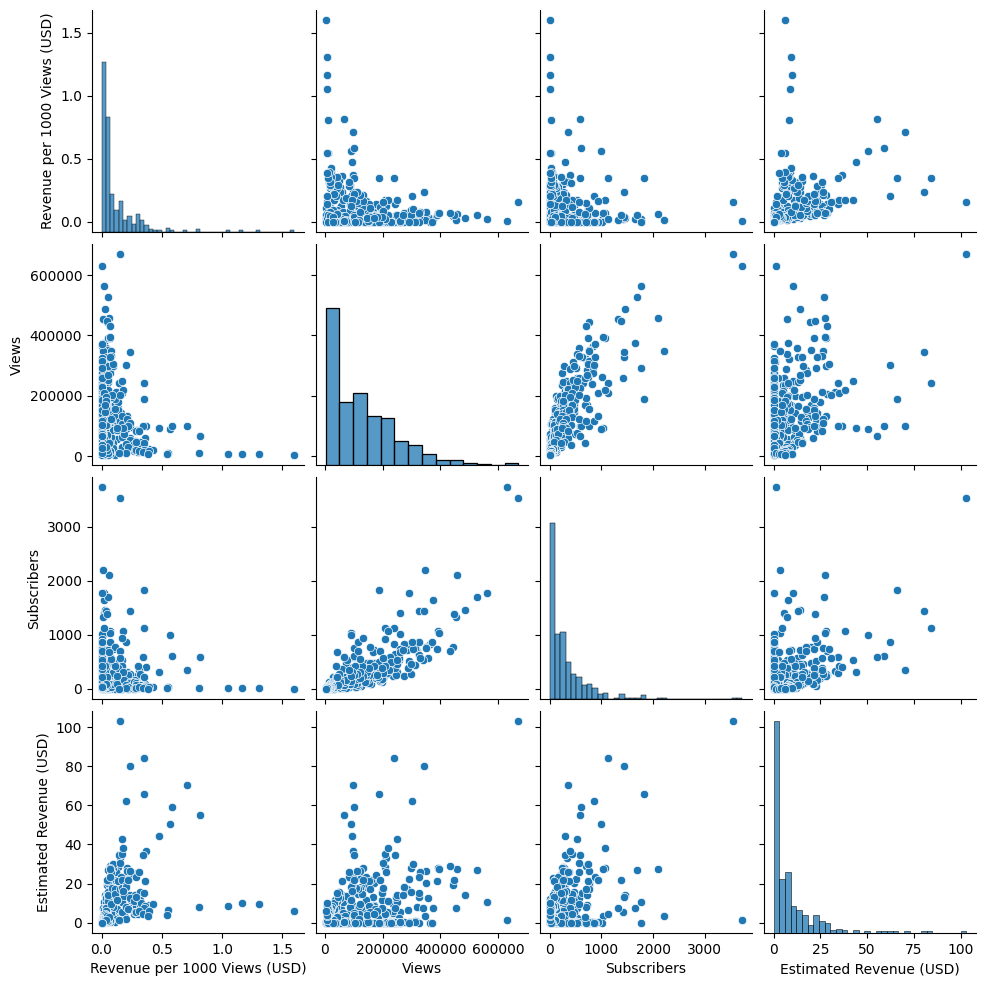

In [ ]:
sns.pairplot(data[['Revenue per 1000 Views (USD)', 'Views',
'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

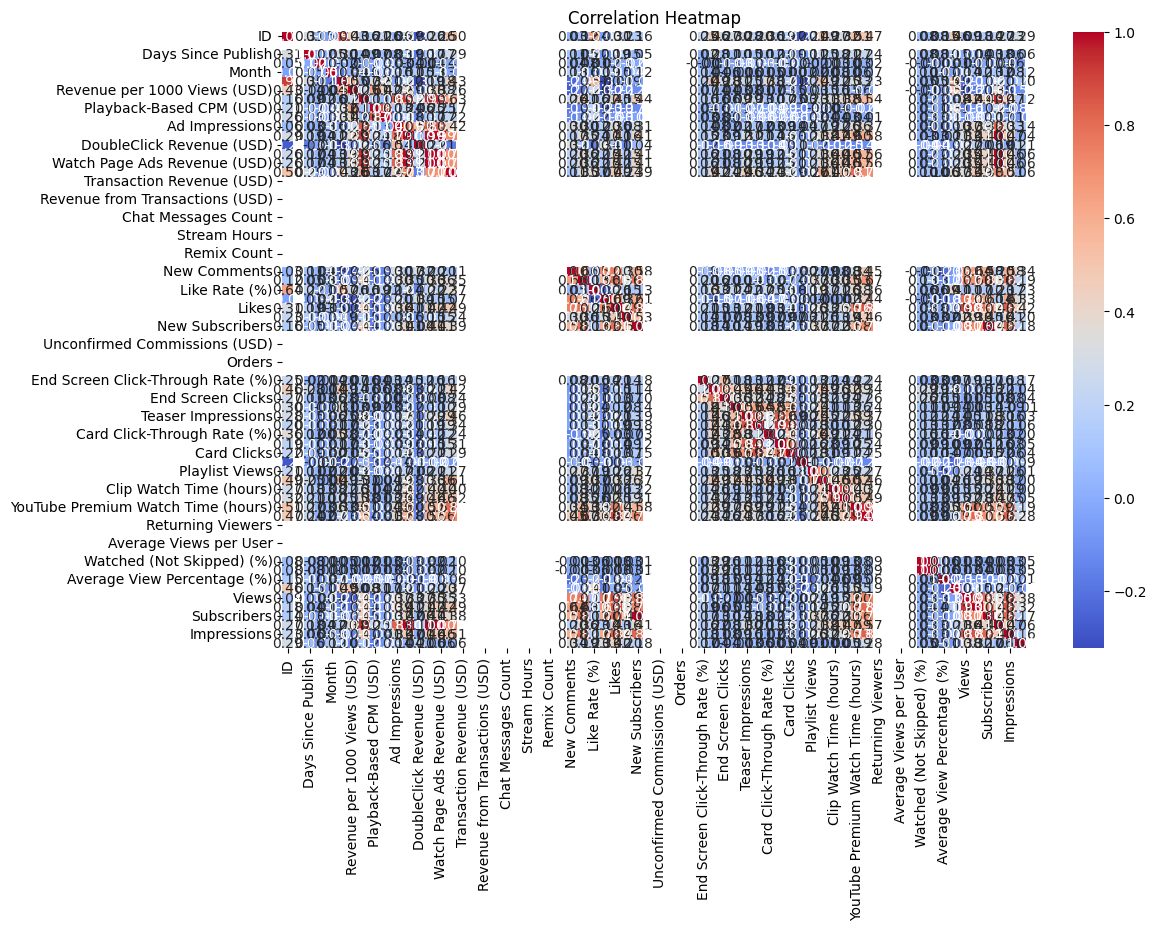

In [ ]:
plt.figure(figsize=(12, 8))
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(['Video Publish Time', 'Day of Week'], axis=1)
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
top_videos = data.sort_values(by='Estimated Revenue (USD)',
ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views',
'Subscribers']])

      ID  Estimated Revenue (USD)   Views  Subscribers
228  228                  103.117  670990         3538
257  257                   83.979  241060         1125
251  251                   80.265  343319         1437
289  289                   70.247   99196          350
278  278                   65.978  188324         1824
260  260                   62.047  302999          866
293  293                   59.058  101025          602
294  294                   55.040   67556          581
290  290                   50.344   89284          995
284  284                   44.228   93487          305


In [ ]:
data['Revenue per View'] = data['Estimated Revenue (USD)'] /data['Views']


In [ ]:
data['Engagement Rate'] = (data['Likes'] + data['Shares'] +
data['New Comments']) / data['Views'] * 100

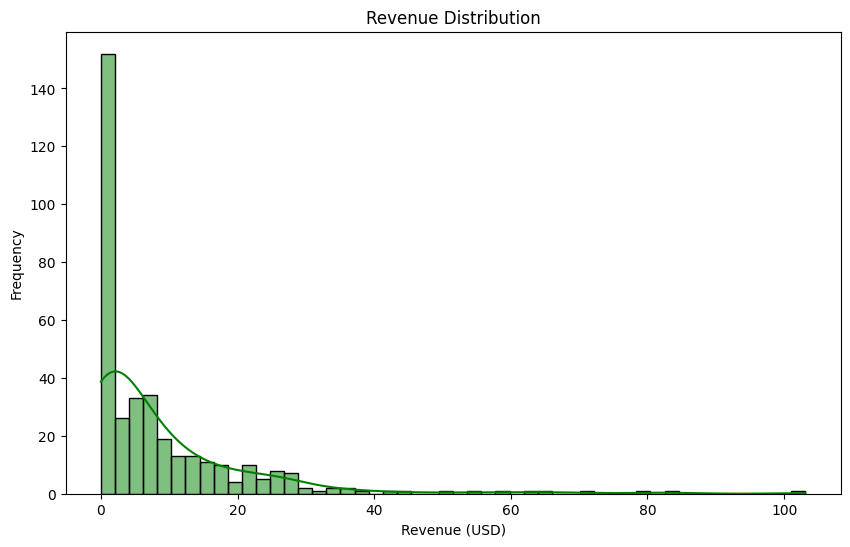

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=50,
kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

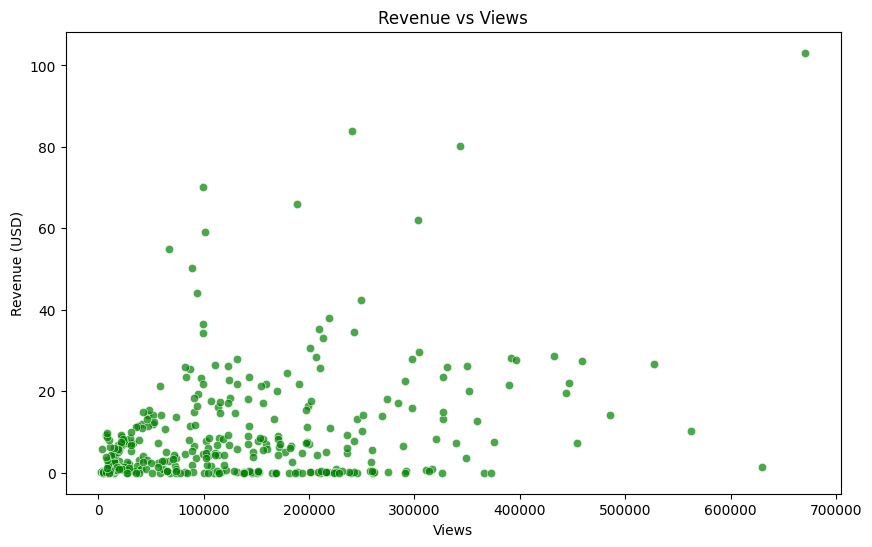

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Views'], y=data['Estimated Revenue (USD)'], alpha=0.7,color="green")
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

In [ ]:
features = ['Views', 'Subscribers', 'Likes', 'Shares',
'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'
X = data[features]
y = data[target]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 75.70
R-squared: 0.13


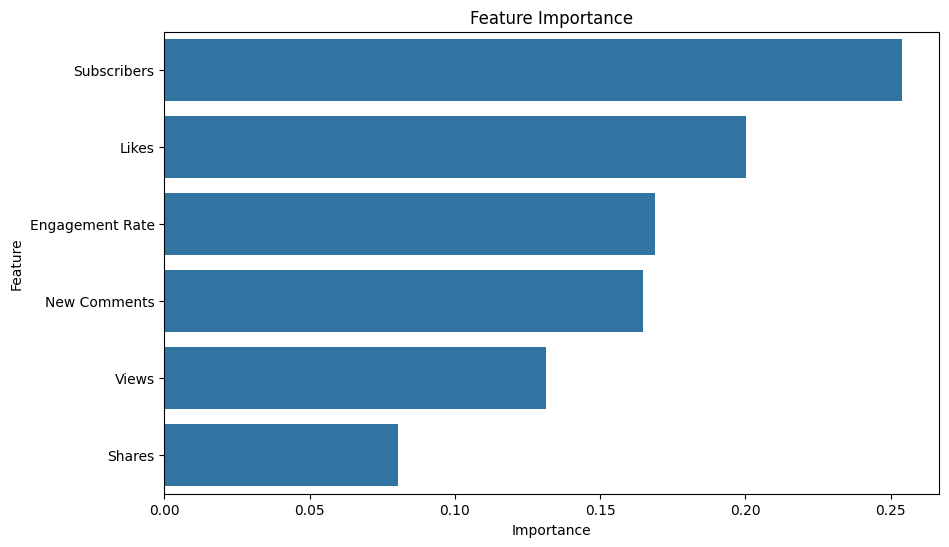

In [ ]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features,
'Importance': importances})
feature_importance_df =feature_importance_df.sort_values(by='Importance',
ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']